# K Means Clustering
<iframe src="https://giphy.com/embed/2Z8gvu6xRbqCHA0bYh" width="480" height="480" style="" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/IntoAction-tote-bag-single-use-plastic-reusable-2Z8gvu6xRbqCHA0bYh">via GIPHY</a></p>


K Means Clustering is the first unsupervised machine learning model that we are doing to look at. The goal of K Means clustering is to group data point together that "look" similar or have similar characteristics. This can be useful when we do not have labels for our data or want to find hidden patterns in our data outside of the labels provided.

Since we do not have a y output to compare to we have to determine our error based on the input data. Lets take a high level look.

Youtube Animation Resource: https://www.youtube.com/watch?v=4b5d3muPQmA

Key Points
- K in K Means, refers to cluster
- Euclidean Distance determines what data point to assign to each cluster
- K Means can be applied to multi dimensional data 
- The Elbow Method can help us determine how many clusters are ideal - this is based on a reduction in variation.

Here we will look at a simple example



In [88]:
import numpy as np
import matplotlib.pyplot as plt

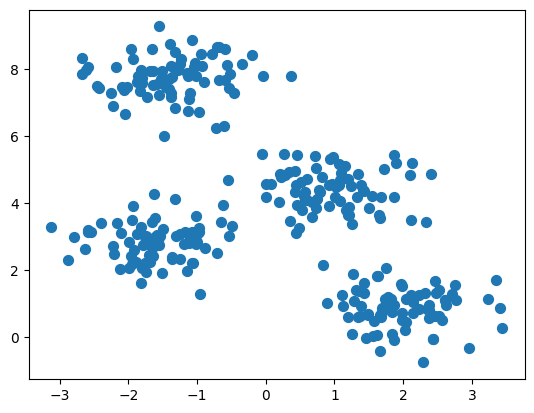

In [89]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.show()

In [90]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

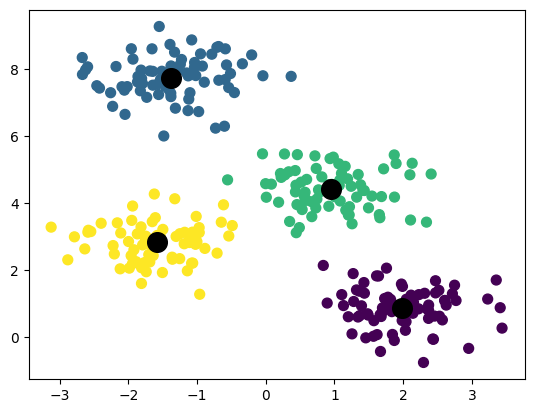

In [91]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200)
plt.show()

Now lets look a more realistic example. We can load the MNIST dataset, a popular toy dataset of hand written numbers. In our example we can pretend that these are "Alien Hieroglyphics" so we don't know what these symbols mean - we can simulate this by not using the labels that are provided with the data set when we train our K-Means model. 

Lets go ahead and take a look at our data.

In [92]:
import pandas as pd
from sklearn.datasets import load_digits

# Look at the Data
from sklearn.datasets import fetch_openml

data, labels = load_digits(return_X_y=True)
data = pd.DataFrame(data)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")



# digits: 10; # samples: 70000; # features 784


pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Name: 0, Length: 784, dtype: int64


<Figure size 640x480 with 0 Axes>

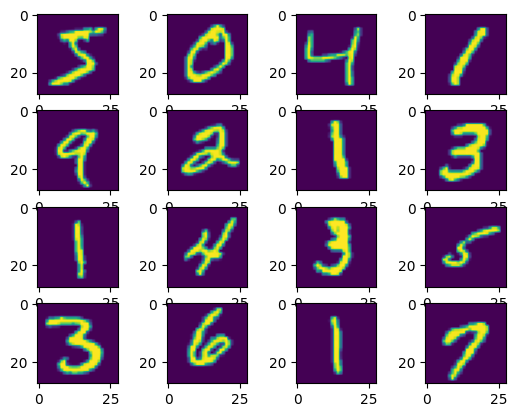

In [93]:
print(data.iloc[0])

def show_nums(data):
    plt.figure()
    fig, axs = plt.subplots(4, 4)
    for i in range(0, 4):
        for j in range (0, 4):
            axs[i, j].imshow(data.iloc[(i*4)+j].values.reshape(28, 28 ))
    plt.show()
show_nums(data)

Since we are pretending we do not know these "extratersial symbols", we do not know how many custers we should use. 

<Figure size 640x480 with 0 Axes>

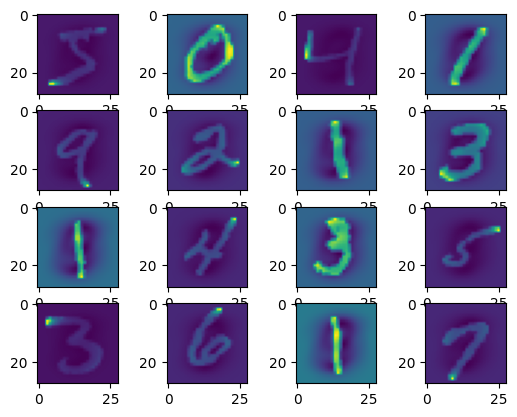

In [94]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
# Standardize each image to better results. Since we are looking at the eudcliand distance of each point to teh cluster. We want to make "darker"
# are not "further" away than lighter marks. We care about the pattern not the light/darkness of the pattern
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler

scaler = StandardScaler()
scaler.fit(data)
data_scaled = pd.DataFrame(scaler.transform(data))
show_nums(data_scaled)


In [95]:
from sklearn.cluster import KMeans


sse = {}
for k in range(2, 40, 2):
    kmeans_model = KMeans(n_clusters=k, max_iter=500, random_state=10)
    kmeans_model.fit(data)
    sse[k] = kmeans_model.inertia_


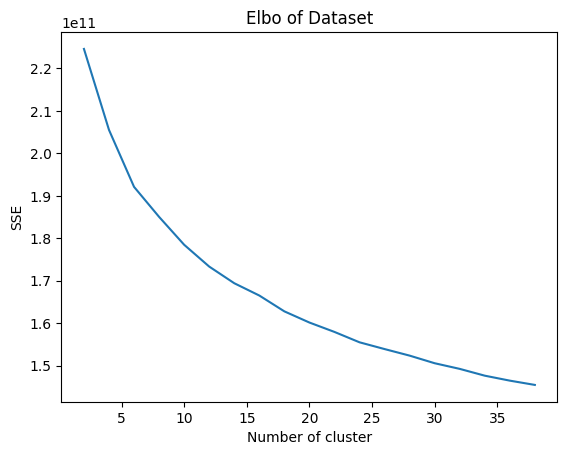

In [96]:
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.title("Elbo of Dataset")
plt.show()

Our elbow does not seem to be obvious, the appropriate number of clusters may be between 5-15. This is where human subjectivity can come into play and with experience. We may try to look at many numbers and see if we can form our own grouping. We can also try to visualize which clusters are being formed to determine what might be the best cluster values. 

To visualize this 784 dimensional space on an x, y coordinate system, we will need to reduce the dimension size down to 2. We can use a helpful tool (which we will go into more depth next lecture) called Principle Component Analysis. At a very high level this tries to find values to the reduced dimension that best represent the full dimension.

In [97]:
from sklearn.decomposition import PCA
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

MemoryError: Unable to allocate 187. GiB for an array with shape (144766, 173357) and data type float64

Citations:
- https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.11-K-Means.ipynb
